# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [6]:

import pandas as pd
df = pd.read_csv(r"C:\Users\gefenk\Documents\Data science\DataScience\bank-full_2016.csv")


2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [101]:
print ("the dinemsion of the table {}".format(df.shape))

print ("the different attirbutes in it: {}".format(df.columns.values))

display(pd.crosstab(index=df['outcome'],  columns="count"))

display(df.head(5))

the dinemsion of the table (45211, 17)
the different attirbutes in it: ['age' 'job' 'marital' 'education' 'default_credit' 'balance'
 'housing_loan' 'personal_loan' 'contact' 'day' 'month' 'duration'
 'campaign' 'days_from_last_contact' 'previous_campaign_contacts'
 'previous_campaign_outcome' 'outcome']


col_0,count
outcome,
no,39922
yes,5289


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no


3) What is the data type of each attribute in the table?

In [102]:
print(df.dtypes)

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object


## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [9]:
array = df['contact'].values !='unknown'
df.loc[:,'isContactKnown'] = pd.Series(array, index=df.index)
df


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


2) Change the type of the 'campaign' attribute to Categorical data.

In [10]:
df["campaign"] = df["campaign"].astype('category')

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [11]:
df.describe()

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

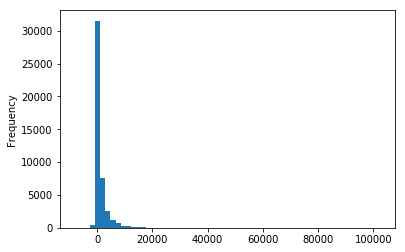

In [29]:
df["balance"].plot.hist(bins=60)
plt.show()


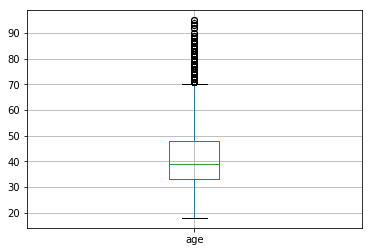

In [30]:
df.boxplot(column=["age"])
plt.show()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

people with positive outcome have a higher balance

[]

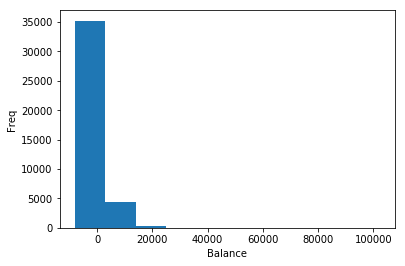

In [41]:
balance_neg_outcome = df[df["outcome"] == "no"]["balance"].plot.hist()
balance_neg_outcome.set_xlabel("Balance")
balance_neg_outcome.set_ylabel("Freq")
import matplotlib.pyplot as plt
balance_neg_outcome.plot()


[]

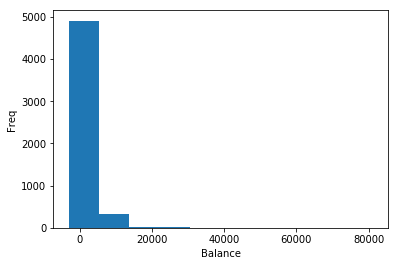

In [42]:
balance_pos_outcome = df[df["outcome"] == "yes"]["balance"].plot.hist()
balance_pos_outcome.set_xlabel("Balance")
balance_pos_outcome.set_ylabel("Freq")
balance_pos_outcome.plot()

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [60]:
for col_lab in df.select_dtypes(include=[object]).axes[1]:
   if ((df[col_lab] == "unknown").sum() > 0):
        print (col_lab,":",(df[col_lab] == "unknown").sum())
    

job : 288
education : 1857
contact : 13020
previous_campaign_outcome : 36959


In [61]:
df.isna().sum()

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
isContactKnown                    0
dtype: int64

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [62]:
df2 = df[(df["contact"] != "cellular") & (df["contact"] != "telephone")]
tab = pd.crosstab(index=df2["contact"], columns="count")
display(tab)
df2

col_0,count
contact,
unknown,13020


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [25]:
df2["days_from_last_contact"].isna().sum()

12950

the missing cells represnet that never been contact to this specific person - for 1/3 from the missing cells people the tabe dont even know if its celular or telephone - new people in the DB


In [63]:
count1 = (df[(df["days_from_last_contact"].isnull()) & (df["previous_campaign_outcome"] != "unknown")]).shape[0]
count2 = (df[(df["days_from_last_contact"].isnull()) & (df["previous_campaign_contacts"] > 0)]).shape[0]
        
print ("people with missing 'days_from_last_contact'with known 'previous_campaign_outcome',"
       "or 'previous_campaign_contacts' > 0 : " + str(count1 + count2))

people with missing 'days_from_last_contact'with known 'previous_campaign_outcome',or 'previous_campaign_contacts' > 0 : 0


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

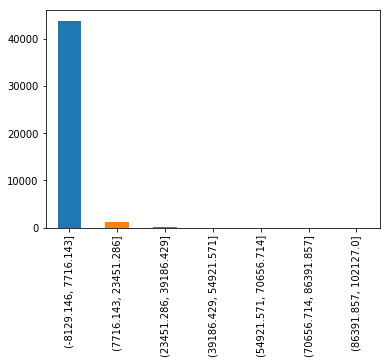

(-8129.146, 7716.143]     43836
(7716.143, 23451.286]      1254
(23451.286, 39186.429]       92
(39186.429, 54921.571]       16
(54921.571, 70656.714]        8
(70656.714, 86391.857]        3
(86391.857, 102127.0]         2
Name: balance, dtype: int64

In [71]:
width= pd.cut(df["balance"], 7).value_counts(sort=False).plot(kind='bar')
plt.show()
width= pd.cut(df["balance"], 7).value_counts(sort=False)
display(width) 

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

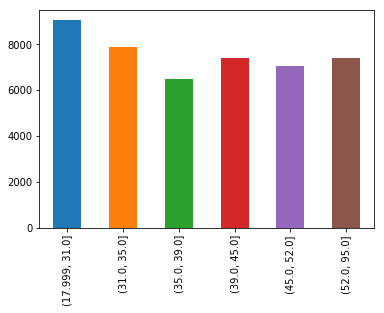

(17.999, 31.0]    9026
(31.0, 35.0]      7881
(35.0, 39.0]      6455
(39.0, 45.0]      7401
(45.0, 52.0]      7040
(52.0, 95.0]      7408
Name: age, dtype: int64

In [73]:
width= pd.qcut(df["age"], 6).value_counts(sort=False).plot(kind='bar')
plt.show()
width= pd.qcut(df["age"], 6).value_counts(sort=False)
display(width) 

3) Propose a way to further discretize the Month column.

there are several ways : 
1. split the data per month , and we can plot it by its frequency
2. give each month number (0-12) and use qcut function to descretize the data as equal depth form
3. split the 12 months to quarters

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [76]:
print (df["age"].corr(df["balance"], method='pearson'))
print (df["age"].corr(df["balance"], method='spearman'))

0.0977827393713475
0.096380304771986


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [77]:
display(df.corr(method ='pearson'))

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts,isContactKnown
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288,0.020132
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674,0.037331
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710,0.034103
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203,0.014379
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885,-0.162032
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000,0.154162
isContactKnown,0.020132,0.037331,0.034103,0.014379,-0.162032,0.154162,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [79]:
import numpy as np
for col_lab in df.select_dtypes(exclude=[object]).axes[1]:
    entropy = 0;
    dic = {};
    for x in df[col_lab][~df[col_lab].isnull()]:
        if x in dic:
            p_x = dic.get(x);
        else:
            p_x = len(df[df[col_lab] == x]) / len(df[col_lab]);
            dic[x] = p_x;
        entropy += - (p_x*np.log2(p_x))
    print (col_lab,"entropy:",entropy)

age entropy: 6490.000545756813
balance entropy: 1209.9791947392016
day entropy: 7830.950224693467
duration entropy: 832.4707128752422
campaign entropy: 19440.573886882645
days_from_last_contact entropy: 73.01000056085482
previous_campaign_contacts entropy: 10185.397328892786
isContactKnown entropy: 17965.40389016442


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [80]:
import sklearn.metrics
mutual = df.apply(lambda x: sklearn.metrics.mutual_info_score(df["outcome"], x))
print (mutual)

age                           0.012903
job                           0.008264
marital                       0.002101
education                     0.002598
default_credit                0.000294
balance                       0.095364
housing_loan                  0.009654
personal_loan                 0.002630
contact                       0.013627
day                           0.006092
month                         0.024351
duration                      0.091761
campaign                      0.004590
days_from_last_contact        0.283855
previous_campaign_contacts    0.012797
previous_campaign_outcome     0.029397
outcome                       0.360874
isContactKnown                0.013573
dtype: float64


"days_from_last_contact"


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

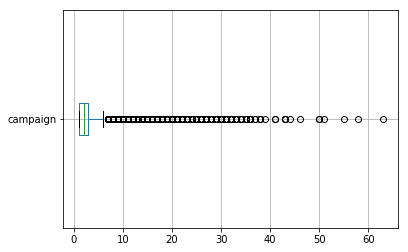

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [83]:
import pandas as pd
df = pd.read_csv(r"C:\Users\gefenk\Documents\Data science\DataScience\bank-full_2016.csv")

df.boxplot(vert = False, column=["campaign"])
plt.show()
display(df.campaign.describe())

we can see in th eplot the right dots outliers , the std is 3.09 while the mean is 2.7 , the maximum numbers are our outliers we can see that 63 is one of them

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

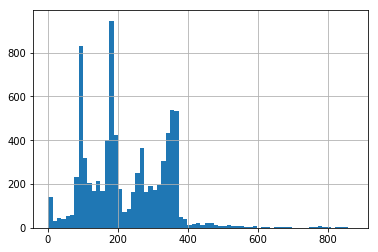

In [85]:
df["days_from_last_contact"].hist(bins=70)

In [99]:
import numpy as np
print ("we can see the data is has curve to the right so we will use the log2 and z normalization ")
log = np.log2(df["days_from_last_contact"])
mean = np.mean(log)
std = np.std(log)
log_norm = (log - mean)/std


we can see the data is has curve to the right so we will use the log2 and z normalization 


Text(0.5, 1.0, 'normalized')

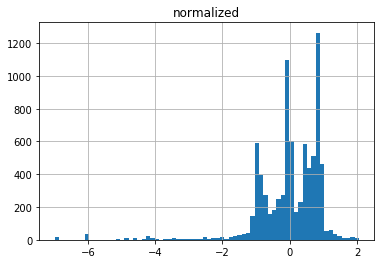

In [100]:
log_norm.hist(bins = 70).set_title("normalized")